In [1]:
import os # allow us to interact with the operating system
import pandas as pd

## Initial data check

In [2]:
def csv_file_records(file_path_read):
    csv_files = []  # list to store all the CSV file names
    total_rows = 0 
    
    # get a list of all CSV files in the specified directory
    for file in os.listdir(file_path_read):
        if file.endswith(".csv"):
            # join the file path with the CSV file name to create a path to the CSV
            csv_path = os.path.join(file_path_read, file)
            csv_file_df = pd.read_csv(csv_path)
            # display the number of rows contained within CSV file
            print(f'{file}: {len(csv_file_df)} rows')
            total_rows += len(csv_file_df)
    
    # display a cumulative total of the number of rows 
    print(f"\nTotal number of rows: {total_rows}")

file_path_read = 'data/raw_renamed'
csv_file_records(file_path_read) # function call to print row counts

audi.csv: 10668 rows
bmw.csv: 10781 rows
cclass.csv: 3899 rows
focus.csv: 5454 rows
ford.csv: 17965 rows
hyundai.csv: 4860 rows
mercedes-benz.csv: 13119 rows
skoda.csv: 6267 rows
toyota.csv: 6738 rows
unclean cclass.csv: 4006 rows
unclean focus.csv: 5604 rows
vauxhall.csv: 13632 rows
volkswagen.csv: 15157 rows

Total number of rows: 118150


## Creating the dataframes

We are going to exclude the following files:
- 'cclass.csv'
- 'focus.csv'
- 'unclean cclass.csv'
- 'unclean focus.csv'

We want to work with the brands and clean data, but the 4 files listed contain uncleaned data with additional columns and are specific models of the particular brand, as such they will be excluded.

<br>Through Excel we can verify the results and use it to determine the number of rows we should expect based on a selection of files.

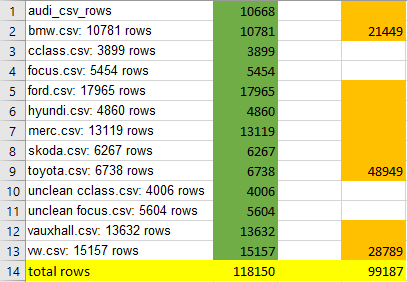

In [3]:
def strip_whitespace(x): 
    if isinstance(x, str):
        return x.strip()
    return x

def read_and_process_csv(file_path_read, file_path_write, exclude_files):
    csv_files = []
    
    # define a dictionary to map the specific brands to countries (based on available data)
    brand_country_mapping = {
        'Audi': 'Germany',
        'BMW': 'Germany',
        'Ford': 'United States',
        'Hyundai': 'South Korea',
        'Mercedes-Benz': 'Germany',
        'Skoda': 'Czech Republic',
        'Toyota': 'Japan',
        'Vauxhall': 'United Kingdom',
        'Volkswagen': 'Germany'
    }
    
    # iterate through the files in the directory
    for file in os.listdir(file_path_read):
        # add CSV files that end with '.csv' and do not contain any 'excluded_files' name to a list
        if file.endswith(".csv") and file not in exclude_files:
            csv_files.append(file)
        else:
            print(f"Skipping csv: {file}")
    
    used_car_data = []
    
    # iterate through the previously created list of CSV files
    for csv_file in csv_files:
        csv_path = os.path.join(file_path_read, csv_file)
        print("Reading csv:", csv_path)
        csv_file_df = pd.read_csv(csv_path) # read the CSV file into a DataFrame

        # get the manufacturer name (assumes the CSV filename is the manufacturer name, hence "raw_renamed" folder, the needed initial step of renaming CSV files)
        brand_name = os.path.splitext(os.path.basename(csv_file))[0] # extract the name of the CSV file without '.csv'
        # based on the available datasets, the brands will have different representations of how the name is displayed
        if brand_name.lower() == 'mercedes-benz':
            brand_name = 'Mercedes-Benz'
        elif brand_name.lower() == 'bmw':
            brand_name = 'BMW'
        else:
            brand_name = brand_name.capitalize()
                  
        # add a column for the "country" based on brand_name as the first column
        csv_file_df.insert(0, 'country', brand_country_mapping.get(brand_name, None))
        
        # add a column for the "brand" as the second column with all other columns preceding it
        csv_file_df.insert(1, 'brand', brand_name)

        # of the available files, Hyundai appears to contain tax in '£', we can write a general expression as follows
        # convert 'tax(£)' to American dollars
        if 'tax(£)' in csv_file_df.columns:
            # assuming the conversion rate from GBP to USD is 1.22 (at the time of implementation)
            csv_file_df.insert(8, 'tax', csv_file_df['tax(£)'] * 1.22)
            # drop the 'tax(£)' column
            csv_file_df.drop('tax(£)', axis = 1, inplace = True)
        
        # function call to strip whitespace from all string columns
        csv_file_df = csv_file_df.applymap(strip_whitespace)

        # save the modified DataFrame to a new CSV file in the 'selected' folder
        output_file_path = os.path.join(file_path_write, f"{brand_name.lower()}_modified.csv")
        csv_file_df.to_csv(output_file_path, index = False)
        
        # iterate through each row in each DataFrame and append it to the 'used_car_data' list
        for _, row in csv_file_df.iterrows():
            used_car_data.append(row.to_dict())  # convert each appended row to a dictionary
        
    return pd.DataFrame(used_car_data)

# define the path to read from (data > raw_renamed)
file_path_read = "data/raw_renamed"
# define the path to write to (data > selected)
file_path_write = "data/modified"
# define the files to be excluded
exclude_files = ['cclass.csv', 'focus.csv', 'unclean cclass.csv', 'unclean focus.csv']

# call the function to process and save each individual CSV
combined_used_car_data = read_and_process_csv(file_path_read, file_path_write, exclude_files)

# save the combine DataFrame to a CSV file without row index value
combined_used_car_data.to_csv("data/modified/combined_used_car_data.csv", index = False)

Skipping csv: cclass.csv
Skipping csv: focus.csv
Skipping csv: unclean cclass.csv
Skipping csv: unclean focus.csv
Reading csv: data/raw_renamed\audi.csv
Reading csv: data/raw_renamed\bmw.csv
Reading csv: data/raw_renamed\ford.csv
Reading csv: data/raw_renamed\hyundai.csv
Reading csv: data/raw_renamed\mercedes-benz.csv
Reading csv: data/raw_renamed\skoda.csv
Reading csv: data/raw_renamed\toyota.csv
Reading csv: data/raw_renamed\vauxhall.csv
Reading csv: data/raw_renamed\volkswagen.csv


Note: the conversion may be slightly off due to how the values are being handled.

### Verify data integrity

In [4]:
file_path_read = 'data/modified'
csv_file_records(file_path_read)

all_cars_1hot_encoded.csv: 99187 rows
audi_modified.csv: 10668 rows
bmw_modified.csv: 10781 rows
combined_used_car_data.csv: 99187 rows
combined_used_car_data_correlation_matrix.csv: 42 rows
df_ready_for_regression.csv: 99187 rows
ford_modified.csv: 17965 rows
hyundai_modified.csv: 4860 rows
mercedes-benz_modified.csv: 13119 rows
skoda_modified.csv: 6267 rows
toyota_modified.csv: 6738 rows
vauxhall_modified.csv: 13632 rows
volkswagen_modified.csv: 15157 rows

Total number of rows: 396790


In [5]:
used_cars_df = pd.read_csv('data/modified/combined_used_car_data.csv') 
print(used_cars_df.info())
used_cars_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       99187 non-null  object 
 1   brand         99187 non-null  object 
 2   model         99187 non-null  object 
 3   year          99187 non-null  int64  
 4   price         99187 non-null  int64  
 5   transmission  99187 non-null  object 
 6   mileage       99187 non-null  int64  
 7   fuelType      99187 non-null  object 
 8   tax           99187 non-null  float64
 9   mpg           99187 non-null  float64
 10  engineSize    99187 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ MB
None


,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Germany,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Germany,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Germany,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Germany,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Germany,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
99182,Germany,Volkswagen,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
99183,Germany,Volkswagen,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
99184,Germany,Volkswagen,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
99185,Germany,Volkswagen,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


## Exploratory data analysis

Exploratory data analysis (EDA) is essential to understand the structure and characteristics of one's data. Considering we have data for different car brands, it might be beneficial to do both individual EDA for each brand and combined EDA for all the data. However, that can be overwhelming amount of information and a very time consuming process, as such we will just be examining the combinded DataFrame.

In our dataset, we can further examine each variable and its interpretation to determine its potential relevance to the price (which will be considered our dependent variable).
- country: may or may not directly influence the price, it can vary from country to country but is hard to justify.
- brand: this will not influence the price when each brand is evaluated individually, it may or may not affect the entire model.
- model: specific models can influence the price as different models have different base prices and features.
- year: crucial factor affecting the price, newer models tend to be more expensive.
- transmission: the type of transmission can influence the price, automatic transmissions are often more expensive.
- mileage: important factor as higher milege generally results in a lower price due to depreciation.
- fuelType: can influence price as some fuel types are more expensive than others.
- tax: can influence the price, especially if it varies significantly based on the year.
- mpg (miles per gallon): this is relevant as it affects the running cost of the car, in other words how fuel-efficient is it.
- engineSize: larger engine sizes may lead to higher prices as they produce more power.

<br> Possible variables of interest: 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', and 'engineSize'.

In [6]:
import matplotlib.pyplot as plt

### Used cars

In [7]:
used_cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,121.605760,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,64.061298,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,677.100000,470.800000,6.600000


In [8]:
used_cars_df.max()

country         United States
brand              Volkswagen
model                      i8
year                     2060
price                  159999
transmission        Semi-Auto
mileage                323000
fuelType               Petrol
tax                     677.1
mpg                     470.8
engineSize                6.6
dtype: object

In [9]:
used_cars_df['year'].value_counts()

year
2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2060        1
Name: count, dtype: int64

From the 'max()' method we were able to determine the highest year as 2060, we can then examine the 'value_counts()' method for all of the years listed. 

Immediately we notice possible outliers, for instance:
- 1 count of year = 2060
- 2 counts of year = 1970 

We will begin by examining the year = 2060 and determine whether or not it was a typo, meant to be year = 2006

In [10]:
used_cars_df[used_cars_df['year'] == 2060]

,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
39175,United States,Ford,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4


The brand is Ford and the model is Fiesta, we can examine the 'used_cars_df' for the 2060 Ford Fiesta models to determine if our theory is correct.

In [11]:
used_cars_df[(used_cars_df['brand'] == 'Ford') 
            & (used_cars_df['model'] == 'Fiesta')
             & (used_cars_df['year'] == 2006)]

,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
37128,United States,Ford,Fiesta,2006,1299,Manual,97556,Diesel,30.0,62.8,1.4
38418,United States,Ford,Fiesta,2006,2395,Manual,63100,Petrol,160.0,47.1,1.2
38431,United States,Ford,Fiesta,2006,2395,Manual,73370,Petrol,160.0,47.1,1.2
38794,United States,Ford,Fiesta,2006,2275,Manual,45000,Petrol,165.0,47.1,1.2


From the four available listings of 2006 Ford Fiesta's, it could be reasonable to say that it was in fact a typo since the 2060 Ford Fiesta has an automatic transmission and a slightly larger engine size (compared to 1.2), these factors tend to increase the price.

In [12]:
# replace the value of 2060 with 2006 in the 'year' column
used_cars_df['year'] = used_cars_df['year'].replace(2060, 2006)

For the year 1970, we only have two models. Following that is year 1996 with two models. Due to this huge gap between years, we would not be able properly represent the data if were to plot it.

As such, we will drop the two models for year 1970.

In [13]:
used_cars_df[used_cars_df['year'] == 1970]

,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
56346,Germany,Mercedes-Benz,M Class,1970,24999,Automatic,14000,Diesel,305.0,39.2,0.0
81235,United Kingdom,Vauxhall,Zafira,1970,10495,Manual,37357,Petrol,200.0,42.2,1.4


In [14]:
# find the indices of rows where 'year' is 1970
rows_to_drop = used_cars_df.index[used_cars_df['year'] == 1970].tolist()

# remove the rows
used_cars_df.drop(index=rows_to_drop, inplace=True)

# reset the index to maintain original DataFrame order
used_cars_df.reset_index(drop=True, inplace=True)

In [15]:
used_cars_df.info()
print('\n')
used_cars_df['year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99185 entries, 0 to 99184
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       99185 non-null  object 
 1   brand         99185 non-null  object 
 2   model         99185 non-null  object 
 3   year          99185 non-null  int64  
 4   price         99185 non-null  int64  
 5   transmission  99185 non-null  object 
 6   mileage       99185 non-null  int64  
 7   fuelType      99185 non-null  object 
 8   tax           99185 non-null  float64
 9   mpg           99185 non-null  float64
 10  engineSize    99185 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.3+ MB




year
2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       87
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
Name: count, dtype: int64

In [17]:
used_cars_df.to_csv("data/eda_process/all_used_car_data.csv", index = False)

We can begin our analysis with a histogram to visualize the distribution of each numerical variable in our data.

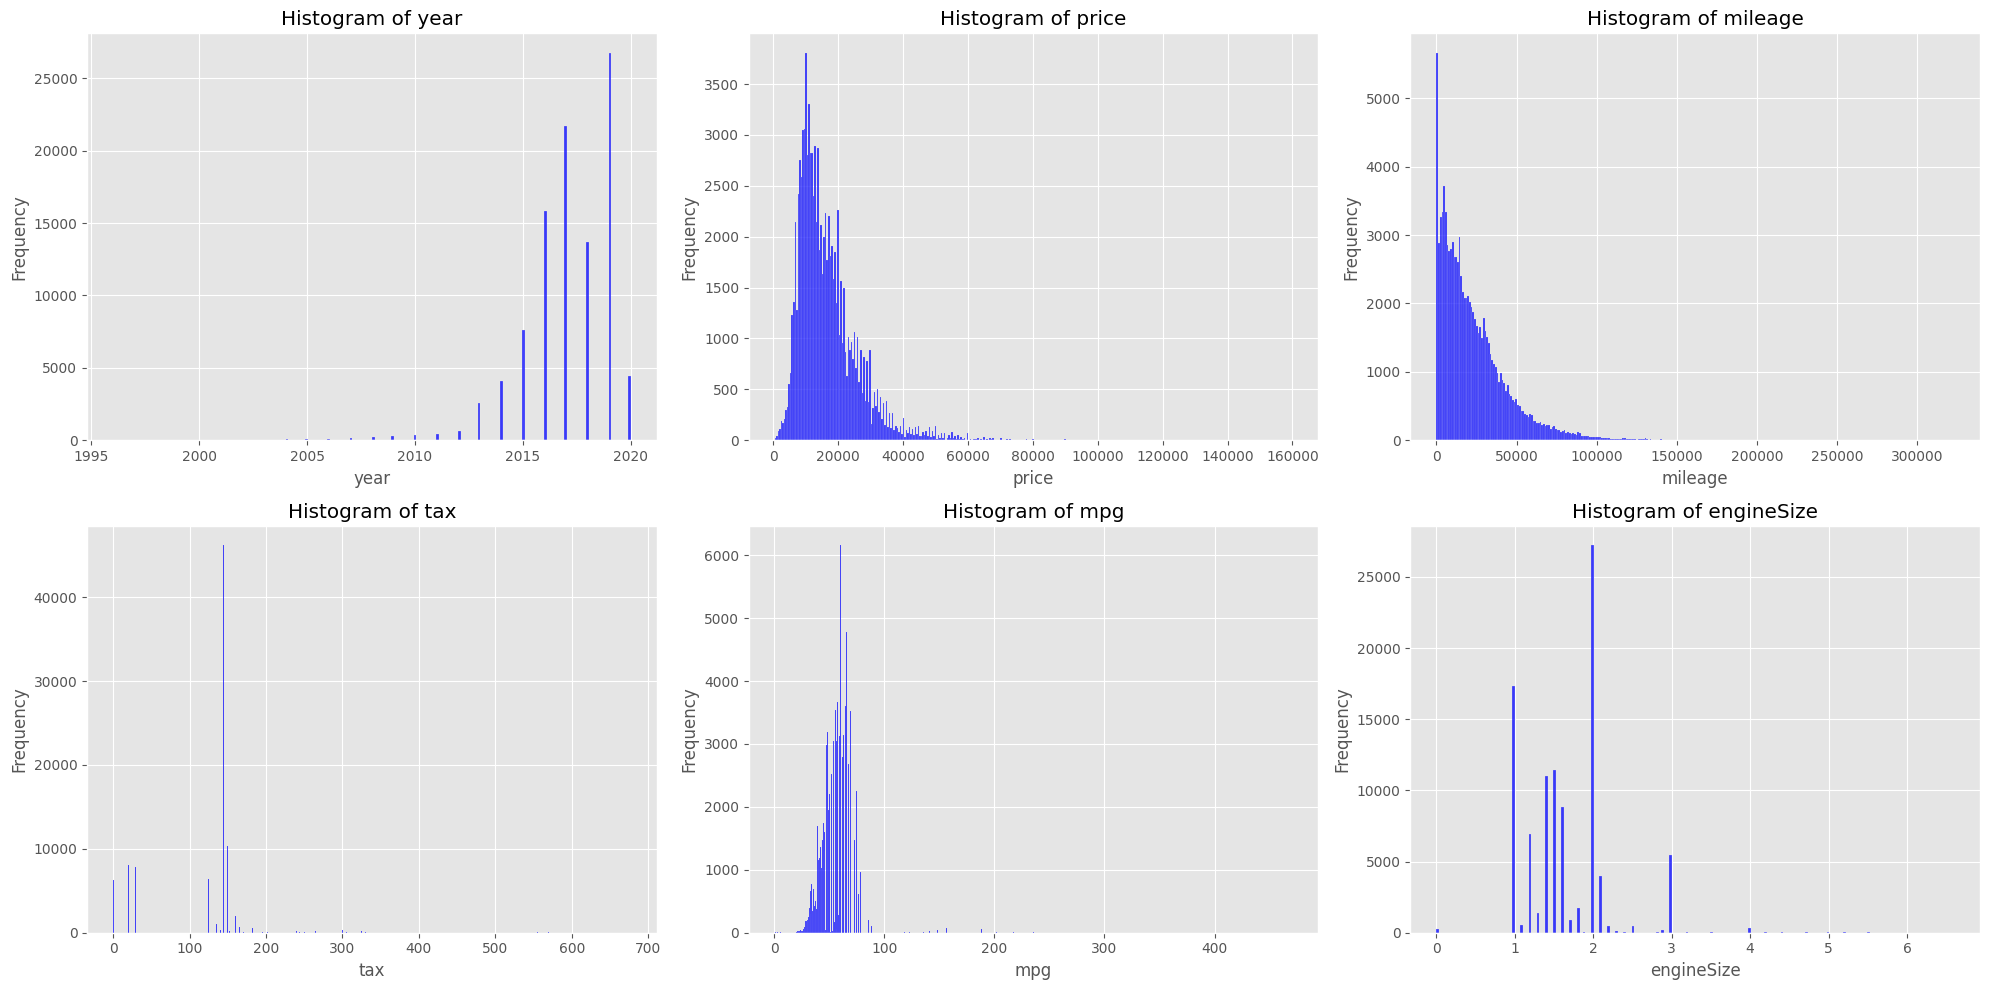

In [18]:
import seaborn as sns

# set the 'ggplot' style
plt.style.use('ggplot')

# select only the numerical columns
numeric_columns = used_cars_df.select_dtypes(include = 'number').columns.tolist()

# determine the number of rows and columns for subplots
num_cols = 3  # number of columns in each row
num_rows = len(numeric_columns) // num_cols + (len(numeric_columns) % num_cols > 0)

# create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (20, 5*num_rows))

# flatten the axis array to simplify indexing
axs = axs.flatten()

# create a histogram for each numerical column
for i, col in enumerate(numeric_columns):
    if i < len(numeric_columns):
        sns.histplot(used_cars_df[col], kde = False, color = 'blue', ax = axs[i])
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')
        axs[i].set_title('Histogram of {}'.format(col))

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

From the histograms we can see that all the numeric data types have a skewed distribution. This indicates we may need to apply a tranformation to stabilize variance and make the data more normally distributed. 

In this case, we can apply the logarithmic transformation.

In [19]:
import numpy as np

# columns to transform ('year' will be excluded along with all other categorical variables)
columns_to_transform = ['price', 'mileage', 'tax', 'mpg', 'engineSize']

used_cars_log_df = used_cars_df.copy()

# apply logarithmic transformation to the specified columns
for col in columns_to_transform:
    # get the index location of a particular column in the original DataFrame
    original_col_index = used_cars_log_df.columns.get_loc(col)
    # insert the transformed column following the original column
    used_cars_log_df.insert(original_col_index + 1, col + '_log', np.log(used_cars_log_df[col] + 1)) # add 1 to handle zero values (log10(0) = null and log10(1) = 0)

In [20]:
used_cars_log_df.info()
print('\n')
used_cars_log_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99185 entries, 0 to 99184
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         99185 non-null  object 
 1   brand           99185 non-null  object 
 2   model           99185 non-null  object 
 3   year            99185 non-null  int64  
 4   price           99185 non-null  int64  
 5   price_log       99185 non-null  float64
 6   transmission    99185 non-null  object 
 7   mileage         99185 non-null  int64  
 8   mileage_log     99185 non-null  float64
 9   fuelType        99185 non-null  object 
 10  tax             99185 non-null  float64
 11  tax_log         99185 non-null  float64
 12  mpg             99185 non-null  float64
 13  mpg_log         99185 non-null  float64
 14  engineSize      99185 non-null  float64
 15  engineSize_log  99185 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 12.1+ MB




,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
0,Germany,Audi,A1,2017,12500,9.433564,Manual,15735,9.663706,Petrol,150.0,5.017280,55.4,4.032469,1.4,0.875469
1,Germany,Audi,A6,2016,16500,9.711176,Automatic,36203,10.496925,Diesel,20.0,3.044522,64.2,4.177459,2.0,1.098612
2,Germany,Audi,A1,2016,11000,9.305741,Manual,29946,10.307184,Petrol,30.0,3.433987,55.4,4.032469,1.4,0.875469
3,Germany,Audi,A4,2017,16800,9.729194,Automatic,25952,10.164042,Diesel,145.0,4.983607,67.3,4.223910,2.0,1.098612
4,Germany,Audi,A3,2019,17300,9.758520,Manual,1998,7.600402,Petrol,145.0,4.983607,49.6,3.923952,1.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99180,Germany,Volkswagen,Eos,2012,5990,8.698014,Manual,74000,11.211834,Diesel,125.0,4.836282,58.9,4.092677,2.0,1.098612
99181,Germany,Volkswagen,Fox,2008,1799,7.495542,Manual,88102,11.386262,Petrol,145.0,4.983607,46.3,3.856510,1.2,0.788457
99182,Germany,Volkswagen,Fox,2009,1590,7.372118,Manual,70000,11.156265,Petrol,200.0,5.303305,42.0,3.761200,1.4,0.875469
99183,Germany,Volkswagen,Fox,2006,1250,7.131699,Manual,82704,11.323035,Petrol,150.0,5.017280,46.3,3.856510,1.2,0.788457


In [21]:
used_cars_log_df.to_csv("data/eda_process/all_used_car_log_data.csv", index = False)

#### Verification and comparison

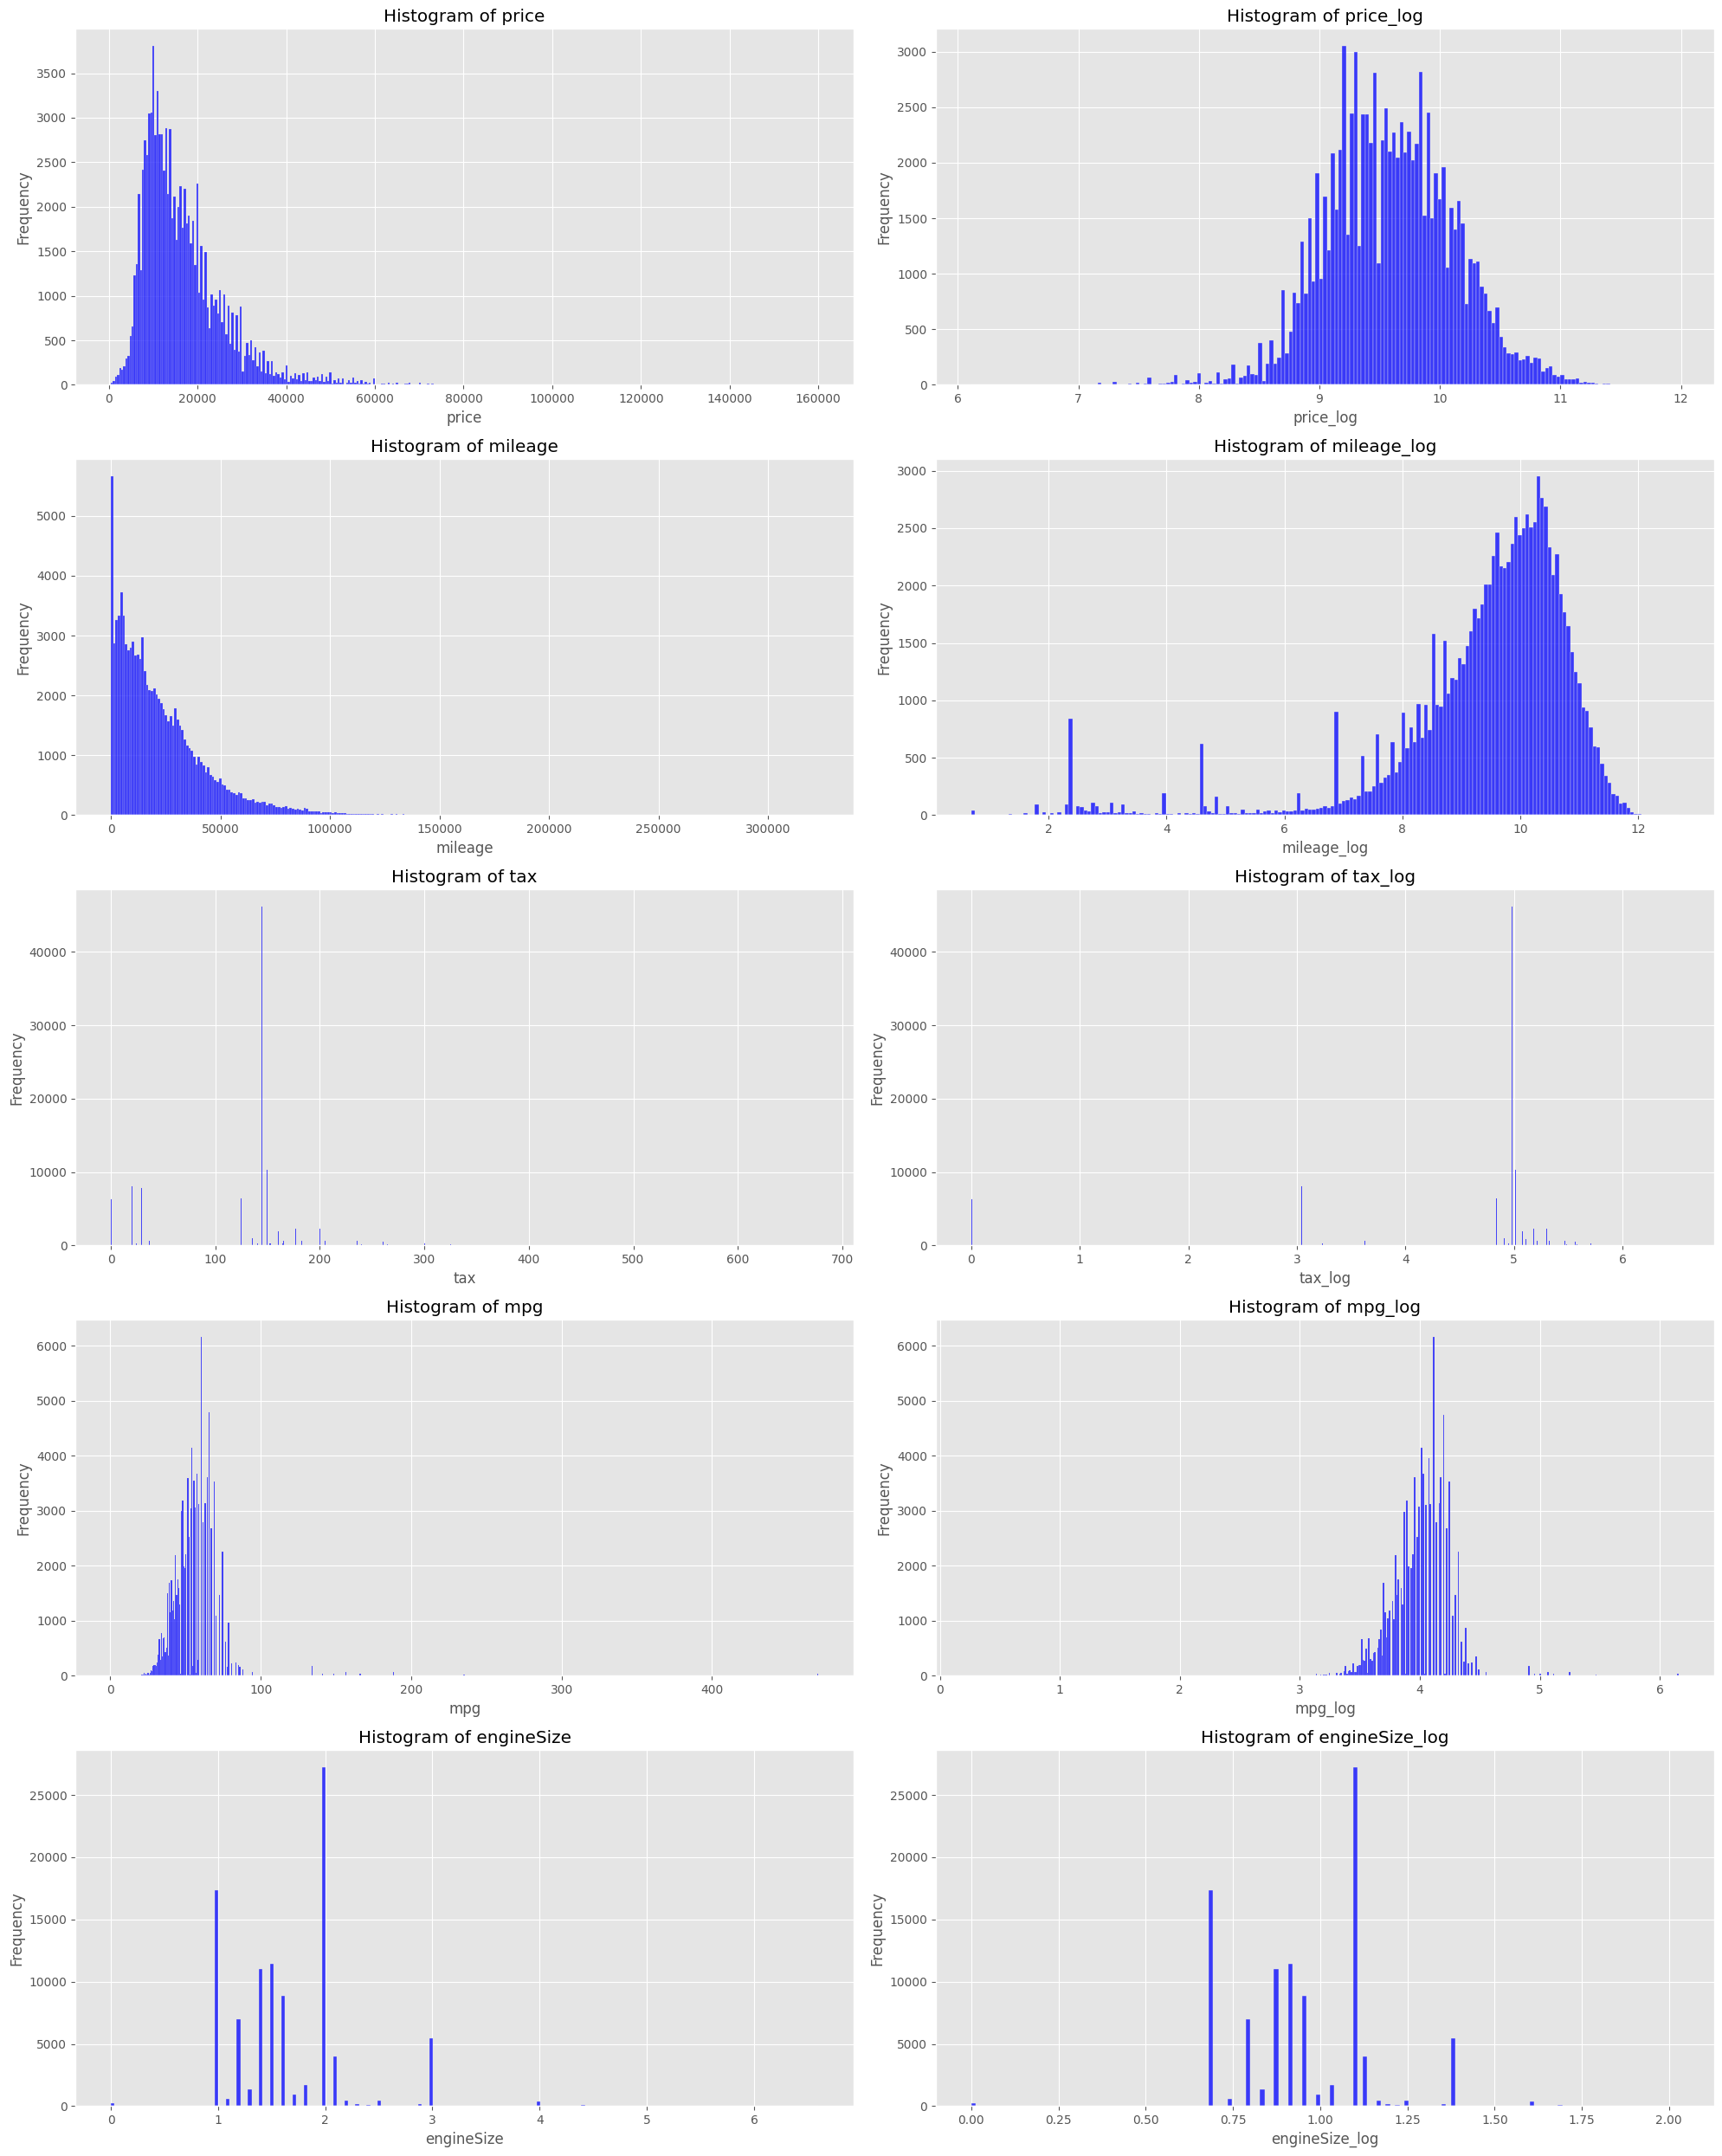

In [22]:
# set the 'ggplot' style
plt.style.use('ggplot')

# select only the relevant columns
relevant_columns = ['price', 'price_log', 'mileage', 'mileage_log', 'tax', 'tax_log', 'mpg', 'mpg_log', 'engineSize', 'engineSize_log']

# determine the number of rows and columns for subplots
num_cols = 2  # number of columns in each row
num_rows = len(relevant_columns) // num_cols + (len(relevant_columns) % num_cols > 0)

# create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (20, 5*num_rows))

# flatten the axis array to simplify indexing
axs = axs.flatten()

# create a histogram for each numerical column
for i, col in enumerate(relevant_columns):
    if i < len(relevant_columns):
        sns.histplot(used_cars_log_df[col], kde = False, color = 'blue', ax = axs[i])
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')
        axs[i].set_title('Histogram of {}'.format(col))

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

Now that we transformed the data to a more normal distribution, we can use it to examine outliers that may exist. However, it should be known that it still may not be easy to interpret and may require assumptions as outliers with one or more variables cannot alone capture the complexities of how price is influenced.

For example, as previously determined, a lot of factors affect 'price' greatly. The 'year' (as different advancements in technology can produce more efficient vehicles), the 'mileage' (the more it is used the more it is depreciated and worn-down), whether or not it is a sports vehicle or is automatic, as well as the 'engineSize' (which can affect the performance) and 'tax' (whether or not it is good for the environment, set by some regulating body).

<br>Below, we showcase three different scenarios to detect possible outliers:
1) The relevant transformed variables.
1) The transformed price evaluated by year.
2) The transformed price dependence on a transformed predictor (e.g. mileage).

However, this just serves an observation purpose, we not will remove outliers as they can provide some important information about the data.

#### Scenario 1: The relevant transformed variables 

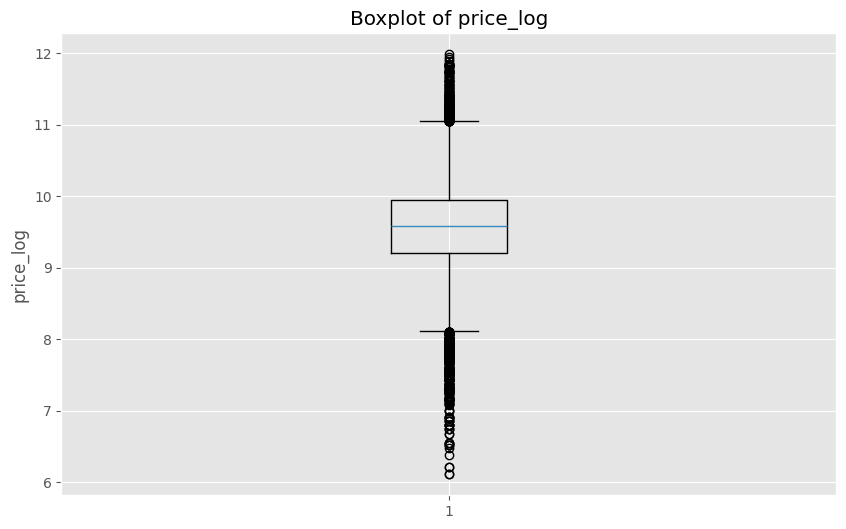

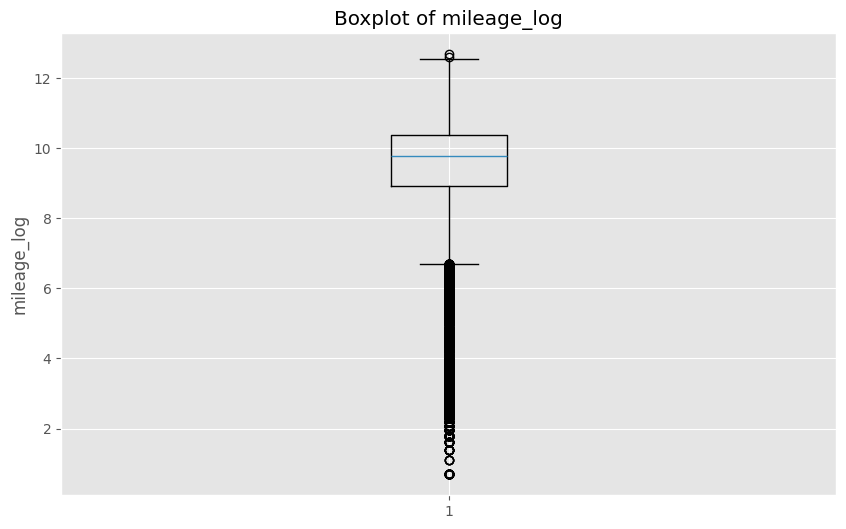

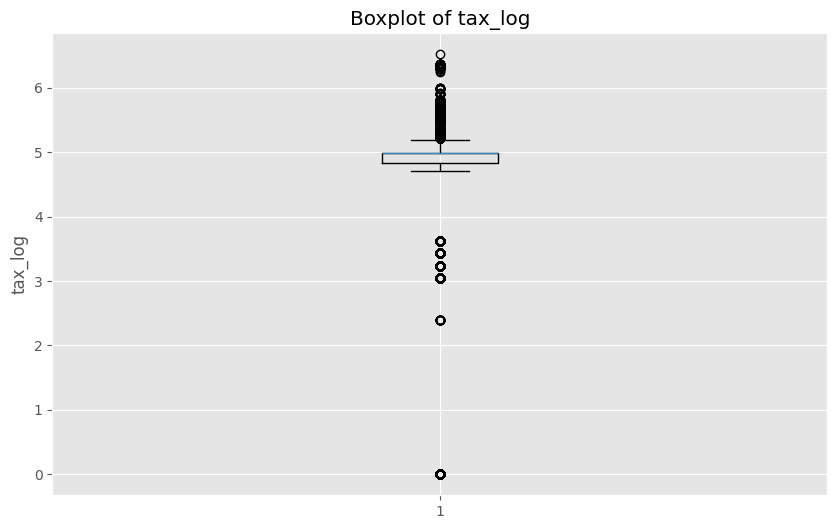

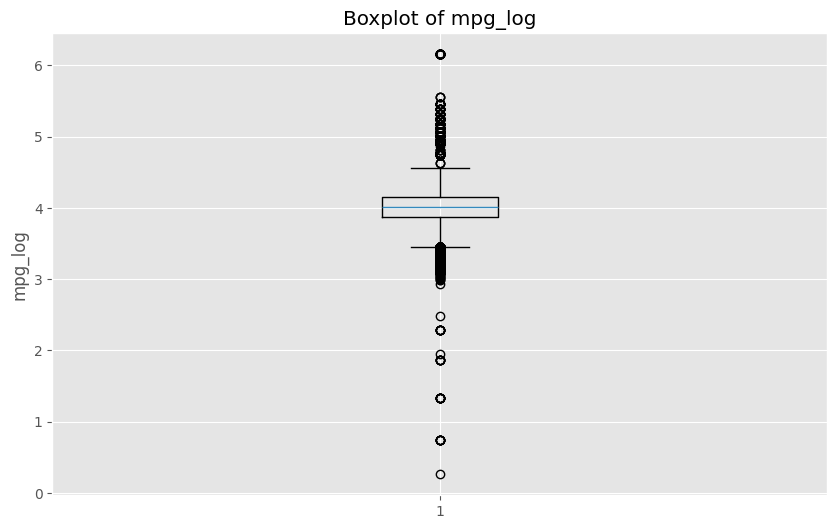

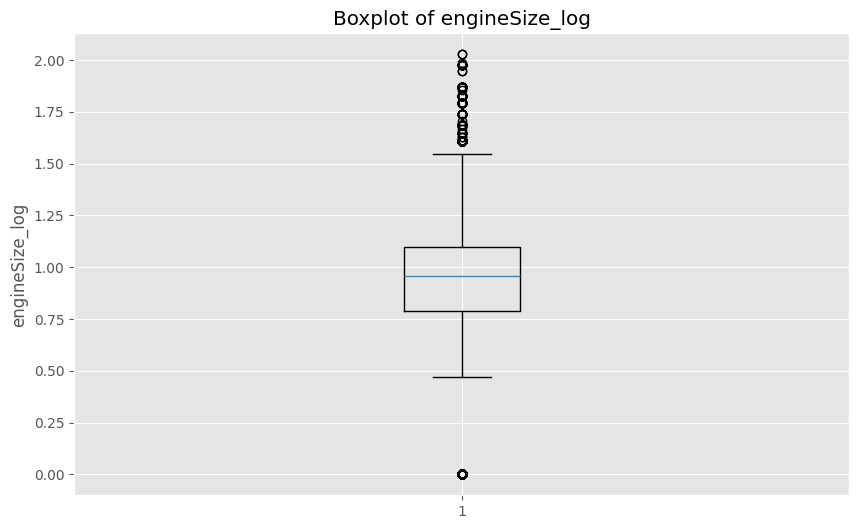


Potential outliers for price_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
198,Germany,Audi,Q7,2020,62985,11.050668,Semi-Auto,10,2.397895,Diesel,145.0,4.983607,33.2,3.532226,3.0,1.386294
299,Germany,Audi,Q8,2018,63985,11.066420,Semi-Auto,8450,9.042040,Diesel,145.0,4.983607,32.8,3.520461,3.0,1.386294
316,Germany,Audi,Q7,2020,82995,11.326548,Semi-Auto,826,6.717805,Diesel,145.0,4.983607,29.4,3.414443,4.0,1.609438
632,Germany,Audi,RS4,2020,69995,11.156193,Semi-Auto,2200,7.696667,Petrol,145.0,4.983607,28.8,3.394508,2.9,1.360977
696,Germany,Audi,Q8,2019,83995,11.338524,Semi-Auto,5978,8.696009,Diesel,150.0,5.017280,30.7,3.456317,4.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,Germany,Volkswagen,Eos,2006,2995,8.005033,Manual,92640,11.436487,Diesel,200.0,5.303305,48.0,3.891820,2.0,1.098612
99181,Germany,Volkswagen,Fox,2008,1799,7.495542,Manual,88102,11.386262,Petrol,145.0,4.983607,46.3,3.856510,1.2,0.788457
99182,Germany,Volkswagen,Fox,2009,1590,7.372118,Manual,70000,11.156265,Petrol,200.0,5.303305,42.0,3.761200,1.4,0.875469
99183,Germany,Volkswagen,Fox,2006,1250,7.131699,Manual,82704,11.323035,Petrol,150.0,5.017280,46.3,3.856510,1.2,0.788457



Potential outliers for mileage_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
196,Germany,Audi,A6,2019,27985,10.239460,Semi-Auto,688,6.535241,Diesel,145.0,4.983607,47.9,3.889777,2.0,1.098612
198,Germany,Audi,Q7,2020,62985,11.050668,Semi-Auto,10,2.397895,Diesel,145.0,4.983607,33.2,3.532226,3.0,1.386294
201,Germany,Audi,A4,2019,24985,10.126071,Semi-Auto,448,6.107023,Petrol,145.0,4.983607,39.8,3.708682,2.0,1.098612
202,Germany,Audi,A4,2019,26985,10.203073,Semi-Auto,476,6.167516,Petrol,145.0,4.983607,39.2,3.693867,2.0,1.098612
206,Germany,Audi,Q5,2019,33985,10.433704,Automatic,355,5.874931,Diesel,145.0,4.983607,39.2,3.693867,2.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98876,Germany,Volkswagen,Tiguan Allspace,2019,28995,10.274913,Semi-Auto,19,2.995732,Diesel,145.0,4.983607,44.1,3.808882,2.0,1.098612
98924,Germany,Volkswagen,Tiguan Allspace,2019,27495,10.221796,Automatic,704,6.558198,Diesel,145.0,4.983607,39.2,3.693867,2.0,1.098612
98944,Germany,Volkswagen,Tiguan Allspace,2020,25950,10.163965,Manual,407,6.011267,Diesel,145.0,4.983607,46.3,3.856510,2.0,1.098612
98945,Germany,Volkswagen,Tiguan Allspace,2020,26950,10.201776,Manual,752,6.624065,Diesel,145.0,4.983607,46.3,3.856510,2.0,1.098612



Potential outliers for tax_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
1,Germany,Audi,A6,2016,16500,9.711176,Automatic,36203,10.496925,Diesel,20.0,3.044522,64.2,4.177459,2.0,1.098612
2,Germany,Audi,A1,2016,11000,9.305741,Manual,29946,10.307184,Petrol,30.0,3.433987,55.4,4.032469,1.4,0.875469
5,Germany,Audi,A1,2016,13900,9.539716,Automatic,32260,10.381614,Petrol,30.0,3.433987,58.9,4.092677,1.4,0.875469
6,Germany,Audi,A6,2016,13250,9.491828,Automatic,76788,11.248817,Diesel,30.0,3.433987,61.4,4.133565,2.0,1.098612
7,Germany,Audi,A4,2016,11750,9.371694,Manual,75185,11.227720,Diesel,20.0,3.044522,70.6,4.271095,2.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99174,Germany,Volkswagen,Eos,2011,7195,8.881281,Manual,43000,10.668979,Petrol,185.0,5.225747,41.5,3.749504,1.4,0.875469
99175,Germany,Volkswagen,Eos,2008,4995,8.516393,Manual,65000,11.082158,Diesel,195.0,5.278115,48.0,3.891820,2.0,1.098612
99176,Germany,Volkswagen,Eos,2008,3695,8.215006,Automatic,127000,11.751950,Petrol,280.0,5.638355,34.5,3.569533,2.0,1.098612
99179,Germany,Volkswagen,Eos,2006,2995,8.005033,Manual,92640,11.436487,Diesel,200.0,5.303305,48.0,3.891820,2.0,1.098612



Potential outliers for mpg_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
199,Germany,Audi,RS6,2016,44985,10.714107,Semi-Auto,49050,10.800616,Petrol,325.0,5.786897,29.4,3.414443,4.0,1.609438
248,Germany,Audi,RS3,2019,43785,10.687069,Semi-Auto,10,2.397895,Petrol,145.0,4.983607,30.1,3.437208,2.5,1.252763
289,Germany,Audi,RS6,2015,46000,10.736418,Semi-Auto,20982,9.951468,Petrol,325.0,5.786897,29.4,3.414443,4.0,1.609438
314,Germany,Audi,A6,2013,12495,9.433164,Manual,49000,10.799596,Diesel,325.0,5.786897,29.7,3.424263,2.0,1.098612
316,Germany,Audi,Q7,2020,82995,11.326548,Semi-Auto,826,6.717805,Diesel,145.0,4.983607,29.4,3.414443,4.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98851,Germany,Volkswagen,Amarok,2019,30000,10.308986,Automatic,8500,9.047939,Diesel,260.0,5.564520,28.3,3.377588,3.0,1.386294
98855,Germany,Volkswagen,Amarok,2019,37995,10.545236,Automatic,7583,8.933796,Diesel,260.0,5.564520,28.3,3.377588,3.0,1.386294
98856,Germany,Volkswagen,Amarok,2019,28995,10.274913,Automatic,10,2.397895,Diesel,260.0,5.564520,28.3,3.377588,3.0,1.386294
99147,Germany,Volkswagen,California,2019,69994,11.156179,Semi-Auto,3544,8.173293,Diesel,260.0,5.564520,29.1,3.404525,2.0,1.098612



Potential outliers for engineSize_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
199,Germany,Audi,RS6,2016,44985,10.714107,Semi-Auto,49050,10.800616,Petrol,325.0,5.786897,29.4,3.414443,4.0,1.609438
284,Germany,Audi,Q7,2016,47995,10.778873,Semi-Auto,46600,10.749377,Diesel,300.0,5.707110,39.2,3.693867,4.0,1.609438
289,Germany,Audi,RS6,2015,46000,10.736418,Semi-Auto,20982,9.951468,Petrol,325.0,5.786897,29.4,3.414443,4.0,1.609438
316,Germany,Audi,Q7,2020,82995,11.326548,Semi-Auto,826,6.717805,Diesel,145.0,4.983607,29.4,3.414443,4.0,1.609438
372,Germany,Audi,RS4,2013,26995,10.203444,Semi-Auto,28359,10.252735,Petrol,565.0,6.338594,26.4,3.310543,4.2,1.648659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95676,Germany,Volkswagen,Tiguan,2016,15300,9.635673,Manual,38398,10.555787,Diesel,145.0,4.983607,53.3,3.994524,0.0,0.000000
95683,Germany,Volkswagen,Tiguan,2018,24000,10.085851,Automatic,22200,10.007893,Diesel,145.0,4.983607,47.9,3.889777,0.0,0.000000
96849,Germany,Volkswagen,Up,2017,8500,9.047939,Manual,20324,9.919607,Petrol,20.0,3.044522,64.2,4.177459,0.0,0.000000
96907,Germany,Volkswagen,Up,2017,8000,8.987322,Manual,24444,10.104181,Petrol,20.0,3.044522,60.1,4.112512,0.0,0.000000


In [23]:
# function to calculate IQR for a given variable
def calculate_iqr(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    return Q1, Q3, Q3 - Q1

# function to identify potential outliers for a given variable
def identify_outliers(data, variable, Q1, Q3, IQR):
    return data[(data[variable] < Q1 - 1.5 * IQR) | (data[variable] > Q3 + 1.5 * IQR)]

# relevant transformed numeric variables
relevant_variables = ['price_log', 'mileage_log', 'tax_log', 'mpg_log', 'engineSize_log']

# boxplot for each relevant variable
for variable in relevant_variables:
    plt.figure(figsize = (10, 6))
    plt.boxplot(used_cars_log_df[variable])
    plt.ylabel(variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

# identify outliers for each relevant variable
for variable in relevant_variables:
    Q1, Q3, IQR = calculate_iqr(used_cars_log_df, variable)
    outliers = identify_outliers(used_cars_log_df, variable, Q1, Q3, IQR)
    print(f"\nPotential outliers for {variable}:")
    # function used to provide a formatted table representation for a DataFrame 
    display(outliers) # this is the default behaviour in Jupyter Notebook, but inside a loop this does not appear to behave as intended

#### Scenario 2: The transformed price evaluated by year

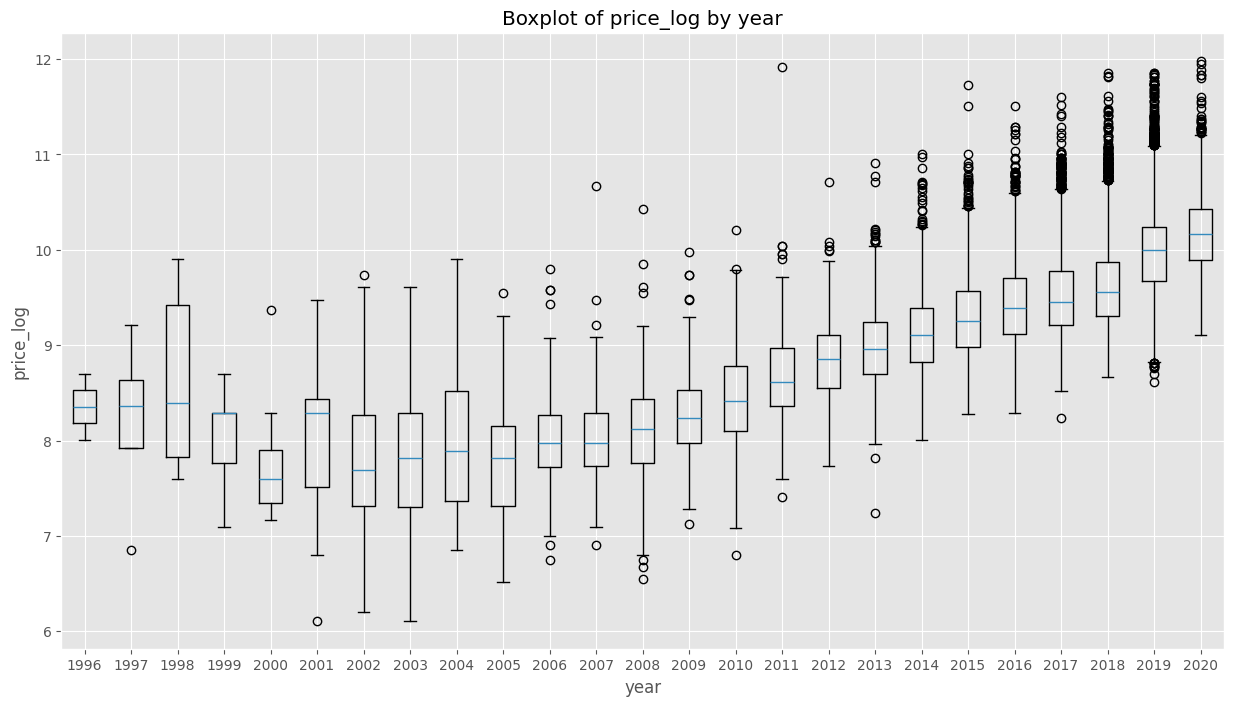


Potential outliers for price_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
198,Germany,Audi,Q7,2020,62985,11.050668,Semi-Auto,10,2.397895,Diesel,145.0,4.983607,33.2,3.532226,3.0,1.386294
299,Germany,Audi,Q8,2018,63985,11.066420,Semi-Auto,8450,9.042040,Diesel,145.0,4.983607,32.8,3.520461,3.0,1.386294
316,Germany,Audi,Q7,2020,82995,11.326548,Semi-Auto,826,6.717805,Diesel,145.0,4.983607,29.4,3.414443,4.0,1.609438
632,Germany,Audi,RS4,2020,69995,11.156193,Semi-Auto,2200,7.696667,Petrol,145.0,4.983607,28.8,3.394508,2.9,1.360977
696,Germany,Audi,Q8,2019,83995,11.338524,Semi-Auto,5978,8.696009,Diesel,150.0,5.017280,30.7,3.456317,4.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,Germany,Volkswagen,Eos,2006,2995,8.005033,Manual,92640,11.436487,Diesel,200.0,5.303305,48.0,3.891820,2.0,1.098612
99181,Germany,Volkswagen,Fox,2008,1799,7.495542,Manual,88102,11.386262,Petrol,145.0,4.983607,46.3,3.856510,1.2,0.788457
99182,Germany,Volkswagen,Fox,2009,1590,7.372118,Manual,70000,11.156265,Petrol,200.0,5.303305,42.0,3.761200,1.4,0.875469
99183,Germany,Volkswagen,Fox,2006,1250,7.131699,Manual,82704,11.323035,Petrol,150.0,5.017280,46.3,3.856510,1.2,0.788457


In [24]:
# extract unique years and sort them in ascending order
unique_years = sorted(used_cars_log_df['year'].unique())

# create a boxplot for 'price_log' considering 'year' in ascending order
plt.figure(figsize = (15, 8))

plot_data = []
labels = []

for year in unique_years:
    plot_data.append(used_cars_log_df[used_cars_log_df['year'] == year]['price_log'])
    labels.append(str(year))

plt.boxplot(plot_data)
plt.xticks(range(1, len(unique_years) + 1), labels) # create the x-axis labels for all the years

plt.xlabel('year')
plt.ylabel('price_log')
plt.title('Boxplot of price_log by year')
plt.show()

# use IQR to identify outliers for price_log
Q1_price_log = used_cars_log_df['price_log'].quantile(0.25)
Q3_price_log = used_cars_log_df['price_log'].quantile(0.75)
IQR_price_log = Q3_price_log - Q1_price_log

# identify potential outliers for price_log
outliers_price_log = used_cars_log_df[(used_cars_log_df['price_log'] < Q1_price_log - 1.5 * IQR_price_log) |
                                      (used_cars_log_df['price_log'] > Q3_price_log + 1.5 * IQR_price_log)]

# print potential outliers for price_log
print("\nPotential outliers for price_log:")
display(outliers_price_log)

outliers_price_log.to_csv("data/eda_process/all_used_car_price_log_outliers.csv", index = False)

#### Scenario 3: The transformed price dependence on transformed predictor mileage

We want to only observe the affect of mileage on price.

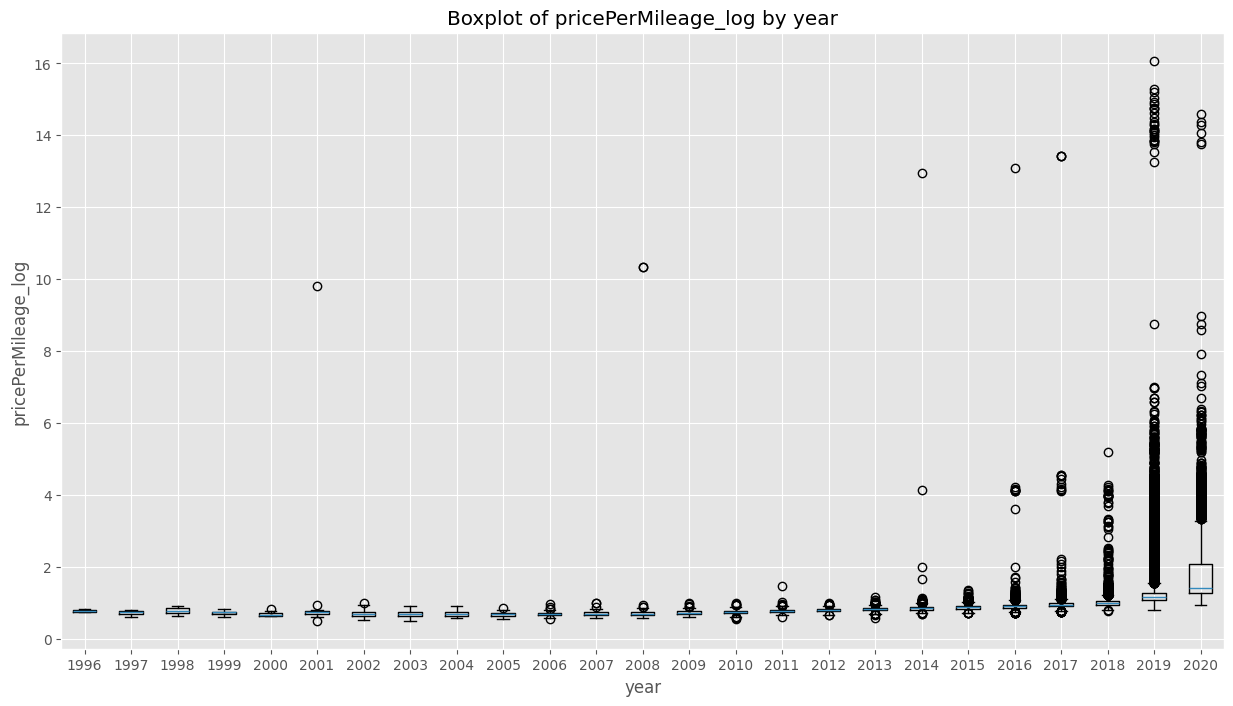


Potential outliers for pricePerMileage_log:


,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log,pricePerMileage_log
196,Germany,Audi,A6,2019,27985,10.239460,Semi-Auto,688,6.535241,Diesel,145.0,4.983607,47.9,3.889777,2.0,1.098612,1.566807
198,Germany,Audi,Q7,2020,62985,11.050668,Semi-Auto,10,2.397895,Diesel,145.0,4.983607,33.2,3.532226,3.0,1.386294,4.608486
200,Germany,Audi,A4,2019,28985,10.274568,Semi-Auto,1024,6.932448,Petrol,145.0,4.983607,38.7,3.681351,2.0,1.098612,1.482098
201,Germany,Audi,A4,2019,24985,10.126071,Semi-Auto,448,6.107023,Petrol,145.0,4.983607,39.8,3.708682,2.0,1.098612,1.658103
202,Germany,Audi,A4,2019,26985,10.203073,Semi-Auto,476,6.167516,Petrol,145.0,4.983607,39.2,3.693867,2.0,1.098612,1.654324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98945,Germany,Volkswagen,Tiguan Allspace,2020,26950,10.201776,Manual,752,6.624065,Diesel,145.0,4.983607,46.3,3.856510,2.0,1.098612,1.540108
98987,Germany,Volkswagen,Shuttle,2020,25199,10.134599,Manual,1000,6.908755,Diesel,150.0,5.017280,37.7,3.655840,2.0,1.098612,1.466921
99013,Germany,Volkswagen,Shuttle,2019,23489,10.064330,Manual,925,6.830874,Diesel,145.0,4.983607,37.7,3.655840,2.0,1.098612,1.473359
99015,Germany,Volkswagen,Jetta,2014,7985,8.985445,Manual,1,0.693147,Diesel,20.0,3.044522,67.3,4.223910,1.6,0.955511,12.963257


In [25]:
# normalize price_log by mileage_log
used_cars_log_df['pricePerMileage_log'] = used_cars_log_df['price_log'] / used_cars_log_df['mileage_log']

# extract unique years and sort them in ascending order
unique_years = sorted(used_cars_log_df['year'].unique())

# create a boxplot for 'pricePerMileage_log' considering 'year' in ascending order
plt.figure(figsize = (15, 8))

plot_data = []
labels = []

for year in unique_years:
    plot_data.append(used_cars_log_df[used_cars_log_df['year'] == year]['pricePerMileage_log'])
    labels.append(str(year))

plt.boxplot(plot_data)
plt.xticks(range(1, len(unique_years) + 1), labels) # create the x-axis labels for all the years

plt.xlabel('year')
plt.ylabel('pricePerMileage_log')
plt.title('Boxplot of pricePerMileage_log by year')
plt.show()

# use IQR to identify outliers for pricePerMileage_log
Q1_normalized_price_log = used_cars_log_df['pricePerMileage_log'].quantile(0.25)
Q3_normalized_price_log = used_cars_log_df['pricePerMileage_log'].quantile(0.75)
IQR_normalized_price_log = Q3_normalized_price_log - Q1_normalized_price_log

# identify potential outliers for pricePerMileage_log
outliers_normalized_price_log = used_cars_log_df[(used_cars_log_df['pricePerMileage_log'] < Q1_normalized_price_log - 1.5 * IQR_normalized_price_log) |
                                                (used_cars_log_df['pricePerMileage_log'] > Q3_normalized_price_log + 1.5 * IQR_normalized_price_log)]

# print potential outliers for pricePerMileage_log
print("\nPotential outliers for pricePerMileage_log:")
display(outliers_normalized_price_log)

outliers_normalized_price_log.to_csv("data/eda_process/all_used_car_pricePerMileage_log_outliers.csv", index = False)

In the exploratory data analysis process (EDA) we began with data that was not normally distributed, we applied a transformation which improved the distribution. From that 'more normal' distribution we examined different variations of boxplots to detect outliers. 

However, we did not 'handle' them since through the process it was observed that price is influenced by a multitude of factors including the year, engine size, brand, tax, fuel type, transmission type, and more. In reality, the relationship between these factors and price is likely to be more complex. 

For instance just observing price per mileage (or an alternative selection) may not always capture the complexities of how the price is influenced by the various factors. While mileage is an important factor, it's certainly not the only determinant of a vehicle's price.

Eliminating the outliers just based on price alone would not make sense, in such a case we may need to apply correlation analysis to understand the relationships between the features and/or regression analysis to quantify the relationship between multiple predictors (features) and the dependent variable (price).

## Correlation Analysis

In [26]:
all_used_cars_data = pd.read_csv('data/eda_process/all_used_car_log_data.csv') 
all_used_cars_data

,country,brand,model,year,price,price_log,transmission,mileage,mileage_log,fuelType,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
0,Germany,Audi,A1,2017,12500,9.433564,Manual,15735,9.663706,Petrol,150.0,5.017280,55.4,4.032469,1.4,0.875469
1,Germany,Audi,A6,2016,16500,9.711176,Automatic,36203,10.496925,Diesel,20.0,3.044522,64.2,4.177459,2.0,1.098612
2,Germany,Audi,A1,2016,11000,9.305741,Manual,29946,10.307184,Petrol,30.0,3.433987,55.4,4.032469,1.4,0.875469
3,Germany,Audi,A4,2017,16800,9.729194,Automatic,25952,10.164042,Diesel,145.0,4.983607,67.3,4.223910,2.0,1.098612
4,Germany,Audi,A3,2019,17300,9.758520,Manual,1998,7.600402,Petrol,145.0,4.983607,49.6,3.923952,1.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99180,Germany,Volkswagen,Eos,2012,5990,8.698014,Manual,74000,11.211834,Diesel,125.0,4.836282,58.9,4.092677,2.0,1.098612
99181,Germany,Volkswagen,Fox,2008,1799,7.495542,Manual,88102,11.386262,Petrol,145.0,4.983607,46.3,3.856510,1.2,0.788457
99182,Germany,Volkswagen,Fox,2009,1590,7.372118,Manual,70000,11.156265,Petrol,200.0,5.303305,42.0,3.761200,1.4,0.875469
99183,Germany,Volkswagen,Fox,2006,1250,7.131699,Manual,82704,11.323035,Petrol,150.0,5.017280,46.3,3.856510,1.2,0.788457


In [27]:
all_used_cars_data.info()
print(f"\n{all_used_cars_data['fuelType'].value_counts()}")
print(f"\n{all_used_cars_data['transmission'].value_counts()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99185 entries, 0 to 99184
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         99185 non-null  object 
 1   brand           99185 non-null  object 
 2   model           99185 non-null  object 
 3   year            99185 non-null  int64  
 4   price           99185 non-null  int64  
 5   price_log       99185 non-null  float64
 6   transmission    99185 non-null  object 
 7   mileage         99185 non-null  int64  
 8   mileage_log     99185 non-null  float64
 9   fuelType        99185 non-null  object 
 10  tax             99185 non-null  float64
 11  tax_log         99185 non-null  float64
 12  mpg             99185 non-null  float64
 13  mpg_log         99185 non-null  float64
 14  engineSize      99185 non-null  float64
 15  engineSize_log  99185 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 12.1+ MB

fuelType
Petrol  

For the heatmap in correlation analysis, it is generally useful to convert categorical variables to numerical values (assuming they are ordinal or at least represent some kind of order). In this case, the categorical columns like 'brand', 'transmission' and 'fuelType' do not have any numerical order, so we will leave them as is to avoid introducing any false numerical relationships between categories.

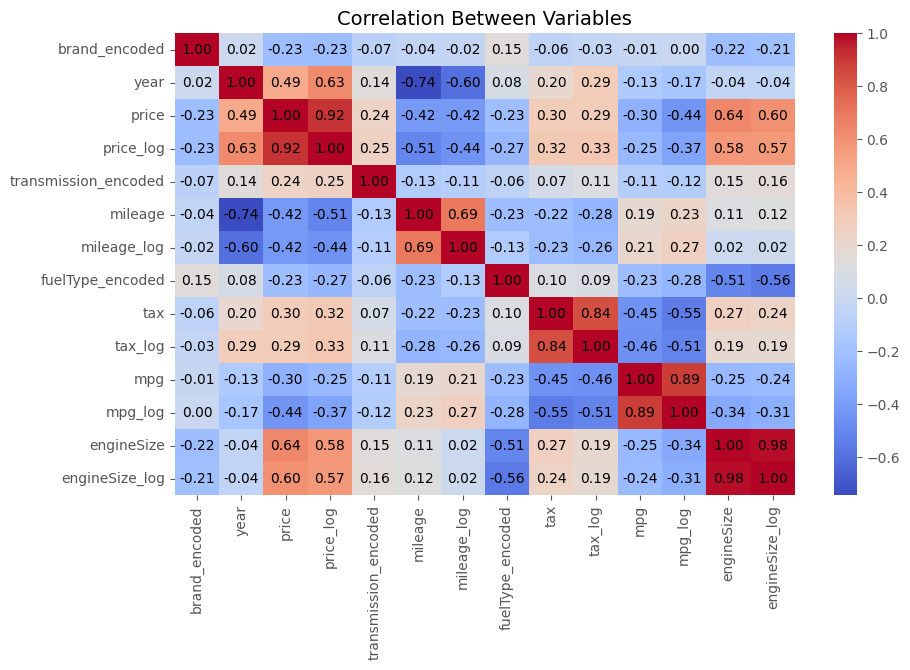

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns and insert them at specific positions
all_used_cars_data.insert(1, 'brand_encoded', label_encoder.fit_transform(all_used_cars_data['brand']))
all_used_cars_data.insert(7, 'transmission_encoded', label_encoder.fit_transform(all_used_cars_data['transmission']))
all_used_cars_data.insert(11, 'fuelType_encoded', label_encoder.fit_transform(all_used_cars_data['fuelType']))

# Calculate correlation matrix
used_cars_corr = all_used_cars_data.drop(['country', 'brand', 'model', 'transmission', 'fuelType'], axis=1).corr()

# Plot the heatmap using 'figure()' to size it
plt.figure(figsize=(10, 6))

# sns.heatmap() is used to provide a graphical representation of data where values are depicted by color
# 'used_cars_corr' is our correlation matrix to visualize, 'annot' is used to display data in the first row, 'cmap' to define color scheme, and 'fmt' is the significant digits
ax = sns.heatmap(used_cars_corr, annot=False, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Between Variables', fontsize=14)

# To display the correlation values in each cell, we can loop through each row and column
for i in range(used_cars_corr.shape[0]):
    for j in range(used_cars_corr.shape[1]):
        text = "{:.2f}".format(used_cars_corr.iloc[i, j])  # use .iloc to access elements
        # Display the values (considered text) based on (x,y) coordinates and aligned in the center 
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=10)

plt.show()

In [36]:
used_cars_corr = used_cars_corr.reset_index(drop=True)
display(used_cars_corr)

,brand_encoded,year,price,price_log,transmission_encoded,mileage,mileage_log,fuelType_encoded,tax,tax_log,mpg,mpg_log,engineSize,engineSize_log
0,1.000000,0.018792,-0.225027,-0.230194,-0.070323,-0.038221,-0.022629,0.152062,-0.056269,-0.027344,-0.014458,0.002334,-0.220625,-0.206108
1,0.018792,1.000000,0.494555,0.630049,0.144290,-0.744070,-0.598659,0.077795,0.197450,0.288998,-0.133920,-0.173332,-0.039502,-0.043504
2,-0.225027,0.494555,1.000000,0.915921,0.242988,-0.417950,-0.418278,-0.225934,0.296801,0.293031,-0.296430,-0.442537,0.638169,0.604347
3,-0.230194,0.630049,0.915921,1.000000,0.250444,-0.511508,-0.444947,-0.266872,0.316076,0.329879,-0.247873,-0.367961,0.577216,0.566855
4,-0.070323,0.144290,0.242988,0.250444,1.000000,-0.125834,-0.105314,-0.061910,0.069586,0.110549,-0.106280,-0.116458,0.150136,0.155255
5,-0.038221,-0.744070,-0.417950,-0.511508,-0.125834,1.000000,0.694220,-0.231439,-0.220830,-0.276298,0.185660,0.229179,0.109068,0.123594
6,-0.022629,-0.598659,-0.418278,-0.444947,-0.105314,0.694220,1.000000,-0.128200,-0.226485,-0.259077,0.208063,0.266242,0.015885,0.024452
7,0.152062,0.077795,-0.225934,-0.266872,-0.061910,-0.231439,-0.128200,1.000000,0.104033,0.094356,-0.231561,-0.280289,-0.511534,-0.555324
8,-0.056269,0.197450,0.296801,0.316076,0.069586,-0.220830,-0.226485,0.104033,1.000000,0.839509,-0.450195,-0.551209,0.268642,0.242966
9,-0.027344,0.288998,0.293031,0.329879,0.110549,-0.276298,-0.259077,0.094356,0.839509,1.000000,-0.458601,-0.513313,0.190960,0.185558


In [39]:
used_cars_corr.to_csv("data/eda_process/used_cars_corr.csv", index = False)

# Ignore past this point

In [94]:
import numpy as np
import statsmodels.api as sm

# Select relevant predictors
predictors = ['year', 'mileage', 'engineSize', 'tax', 'mpg']

# Add the numeric representation of 'transmission' as a predictor
predictors.append('transmission')

# Add a constant term (intercept) to the predictors
X = sm.add_constant(audi_df[predictors])

# Dependent variable
y = audi_df['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     6197.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:50:09   Log-Likelihood:            -1.0707e+05
No. Observations:               10668   AIC:                         2.142e+05
Df Residuals:                   10661   BIC:                         2.142e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.028e+06   8.35e+04    -48.273   

-different countries have different classifications of car sizes, cannot accurately size
-need a 'master' list

-having weight classes would have been easier to classify the vehicles into categories e.g. light duty, medium duty, heavy duty. https://afdc.energy.gov/data/10380

-perhaps engine size could be the identifier

-cannot really explore outliers because of how dependent the data is on each other, e.g. price heavily depends on mileage, engineSize, tax, mpg, and year

In [125]:
import requests

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Parameters for the API request to extract content
    params = {
        'action': 'parse',
        'format': 'json',
        'page': 'List_of_current_automobile_manufacturers_by_country',
        'section': 1  # Section number where the content is present
    }

    try:
        # Send a request to the Wikipedia API
        response = requests.get(api_endpoint, params=params)
        response_data = response.json()

        # Check if the response is valid
        if 'parse' not in response_data:
            print("Failed to retrieve data from Wikipedia.")
            return None

        # Extract the content from the parsed data
        content = response_data['parse']['text']['*']

        # Use BeautifulSoup to parse the content
        soup = BeautifulSoup(content, 'html.parser')

        # Process the data and extract country names and corresponding car manufacturers
        country_car_mapping = {}
        current_country = None

        for element in soup.find_all(['h3', 'ul']):
            if element.name == 'h3':
                current_country = element.text.strip()
                country_car_mapping[current_country] = []
            elif element.name == 'ul' and current_country:
                car_manufacturers = element.find_all('li')
                for manufacturer in car_manufacturers:
                    country_car_mapping[current_country].append(manufacturer.text.strip())

        return country_car_mapping

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return None

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']



In [126]:
country_car_mapping_api

{'Algeria[edit]': ['SNVI'],
 'Argentina[edit]': ['Zanella', 'Koller'],
 'Australia[edit]': ['ACE EV Group',
  'Borland Racing',
  'Bolwell',
  'Brabham Automotive',
  'Elfin Sports Cars',
  'Ford Australia',
  'GMSV'],
 'Austria[edit]': ['Magna Steyr', 'Puch', 'Tushek & Spigel'],
 'Azerbaijan[edit]': ['AzSamand',
  'Ganja Auto Plant',
  'Nakhchivan Automobile Plant']}

In [127]:
import requests
from bs4 import BeautifulSoup

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Dictionary to store country-car mapping
    country_car_mapping = {}

    # Iterate through sections A to Z
    for section_number in range(1, 27):  # 26 sections for each letter of the alphabet
        # Parameters for the API request to extract content for the specific section
        params = {
            'action': 'parse',
            'format': 'json',
            'page': 'List_of_current_automobile_manufacturers_by_country',
            'section': section_number
        }

        try:
            # Send a request to the Wikipedia API
            response = requests.get(api_endpoint, params=params)
            response_data = response.json()

            # Check if the response is valid
            if 'parse' not in response_data:
                print(f"Failed to retrieve data for section {chr(64 + section_number)}")
                continue

            # Extract the content from the parsed data
            content = response_data['parse']['text']['*']

            # Use BeautifulSoup to parse the content
            soup = BeautifulSoup(content, 'html.parser')

            # Process the data and extract country names and corresponding car manufacturers
            current_country = None
            for element in soup.find_all(['h3', 'ul']):
                if element.name == 'h3':
                    current_country = element.text.strip()
                    country_car_mapping.setdefault(current_country, [])
                elif element.name == 'ul' and current_country:
                    car_manufacturers = element.find_all('li')
                    for manufacturer in car_manufacturers:
                        country_car_mapping[current_country].append(manufacturer.text.strip())

        except requests.exceptions.RequestException as e:
            print(f"Error for section {chr(64 + section_number)}: {e}")

    return country_car_mapping

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI', 'SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller', 'Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV', 'ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel', 'Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant', 'AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']

Country: Bangladesh[edit]
Car Manufacturers: ['Aftab Automobiles', 'PHP Automobiles', 'Aftab Automobiles', 'PHP Automobiles']

Country: Belarus[edit]
Car Manufacturers: ['BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman', 'BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman']

Coun

In [2]:
import requests
from bs4 import BeautifulSoup
import time

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Dictionary to store country-car mapping
    country_car_mapping = {}

    # Iterate through sections A to Z
    for section_number in range(1, 27):  # 26 sections for each letter of the alphabet
        # Parameters for the API request to extract content for the specific section
        params = {
            'action': 'parse',
            'format': 'json',
            'page': 'List_of_current_automobile_manufacturers_by_country',
            'section': section_number
        }

        try:
            # Send a request to the Wikipedia API
            response = requests.get(api_endpoint, params=params)
            response_data = response.json()

            # Check if the response is valid
            if 'parse' not in response_data:
                print(f"Failed to retrieve data for section {chr(64 + section_number)}")
                continue

            # Extract the content from the parsed data
            content = response_data['parse']['text']['*']

            # Use BeautifulSoup to parse the content
            soup = BeautifulSoup(content, 'html.parser')

            # Process the data and extract country names and corresponding car manufacturers
            current_country = None
            for element in soup.find_all(['h3', 'ul']):
                if element.name == 'h3':
                    current_country = element.text.strip()
                    country_car_mapping.setdefault(current_country, [])
                elif element.name == 'ul' and current_country:
                    car_manufacturers = element.find_all('li')
                    for manufacturer in car_manufacturers:
                        country_car_mapping[current_country].append(manufacturer.text.strip())

            # Introduce a delay to stay within API rate limits
            time.sleep(1)

        except requests.exceptions.RequestException as e:
            print(f"Error for section {chr(64 + section_number)}: {e}")

    return country_car_mapping

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI', 'SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller', 'Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV', 'ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel', 'Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant', 'AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']

Country: Bangladesh[edit]
Car Manufacturers: ['Aftab Automobiles', 'PHP Automobiles', 'Aftab Automobiles', 'PHP Automobiles']

Country: Belarus[edit]
Car Manufacturers: ['BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman', 'BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman']

Coun